In [1]:
import pandas as pd
import seaborn as sns
pd.set_option("display.max_columns", None)
import reverse_geocoder
import time

In [2]:
atlantic = pd.read_csv('../data/hurricanes_east_coast.csv', na_values = ' ')

/Users/jocelynlutes/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,3,8,9,10,11,14,15,19,20,21,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,48,49,51,52,54,55,57,58,59,60,62,63,64,65,67,68,70,71,72,73,75,76,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,95,96,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,117,118,120,121,122,123,124,125,126,127,128,129,130,131,132,134,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
atlantic = atlantic[['SID','SEASON', 'NUMBER', 'NAME','ISO_TIME','NATURE','LAT','LON','WMO_WIND','WMO_PRES', 'WMO_AGENCY', 'DIST2LAND', 'LANDFALL', 'USA_LAT', 'USA_LON', 'USA_RECORD', 'USA_STATUS', 'USA_WIND', 'USA_PRES', 'USA_SSHS', 'USA_EYE', 'USA_SEAHGT', 'STORM_SPEED', 'STORM_DIR']]

In [4]:
atlantic.rename(columns = {
    "SID" : "storm_id",
    "SEASON" : "year",
    "LAT" : "latitude",
    "LON" : "longitude",
    "WMO_WIND" : "wmo_wind(knots)",
    "WMO_PRES" : "wmo_pressure(mb)", # World Meteorological Organization
    "DIST2LAND" : "dist2land(km)",
    "LANDFALL" : "landfall(km)",
    "USA_SSHS" : "storm_category",
    "USA_EYE" : "eye_diameter",
    "USA_SEAHGT" : "sea_height(ft)",
    "STORM_SPEED" : "storm_speed(knots)",
    "STORM_DIR" : "storm_direction(degrees)"
    }, inplace = True)
atlantic.columns = atlantic.columns.str.lower()
atlantic.drop(index = 0, inplace = True)
atlantic.reset_index(drop = True, inplace = True)

In [5]:
atlantic['landfall(km)'] = atlantic['landfall(km)'].map(float)

In [6]:
atlantic = atlantic[atlantic['landfall(km)'] == 0]

In [7]:
atlantic.to_csv('../data/hurricanes_east_coast_landfall.csv', index = False)
df = pd.read_csv('../data/hurricanes_east_coast_landfall.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14214 entries, 0 to 14213
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   storm_id                  14214 non-null  object 
 1   year                      14214 non-null  int64  
 2   number                    14214 non-null  float64
 3   name                      14214 non-null  object 
 4   iso_time                  14214 non-null  object 
 5   nature                    14214 non-null  object 
 6   latitude                  14214 non-null  float64
 7   longitude                 14214 non-null  float64
 8   wmo_wind(knots)           6639 non-null   float64
 9   wmo_pressure(mb)          2800 non-null   float64
 10  wmo_agency                6654 non-null   object 
 11  dist2land(km)             14214 non-null  int64  
 12  landfall(km)              14214 non-null  float64
 13  usa_lat                   12918 non-null  float64
 14  usa_lo

In [9]:
df.shape

(14214, 24)

In [10]:
df.drop(columns = 'usa_record', inplace = True)

In [11]:
df.drop(columns = 'eye_diameter', inplace = True)

In [12]:
df.shape

(14214, 22)

In [13]:
#from geopy.geocoders import Nominatim

In [14]:
# locator = Nominatim(user_agent = 'beta_dsi12')
# coordinates = (28.1667, -96.8)
# location = locator.reverse(coordinates)
# location.raw

In [15]:
# def get_country(lat_lon_tup):
#     location = locator.reverse(lat_lon_tup)
#     location_dict = location.raw
#     return location_dict['address']['country_code']

In [16]:
# def get_state(latitude, longitude):
#     coordinates = (latitude, longitude)
#     location = locator.reverse(coordinates)
#     location_dict = location.raw
#     return location_dict['address']['state']

In [17]:
# def get_county(latitude, longitude):
#     coordinates = (latitude, longitude)
#     location = locator.reverse(coordinates)
#     location_dict = location.raw
#     return location_dict['address']['county']

In [18]:
# get_country(28.1667, -96.8)

In [19]:
# get_state(28.1667, -96.8)

In [20]:
# get_county(28.1667, -96.8)

In [21]:
# df['lat_lon_tuple'] = list(df[['latitude', 'longitude']].itertuples(index = False, name = None))

In [22]:
import matplotlib.pyplot as plt

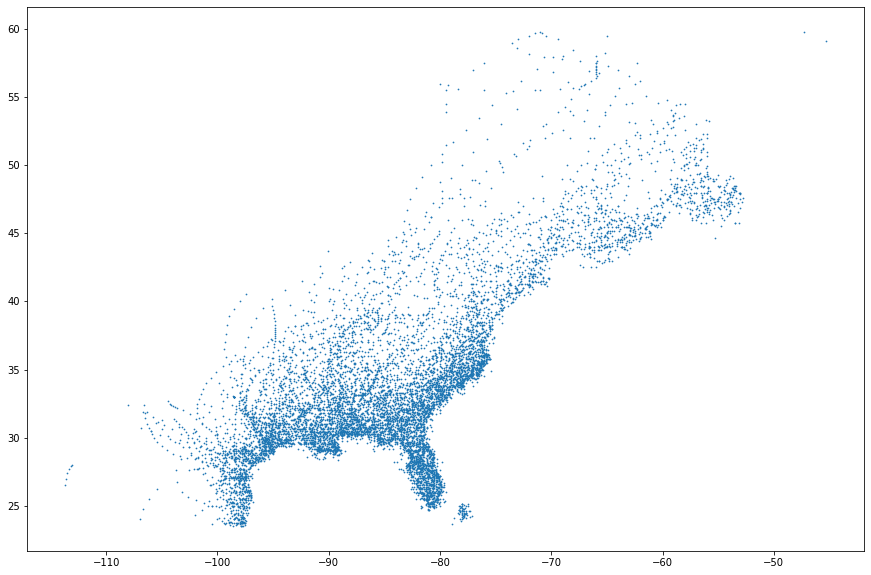

In [25]:
plt.figure(figsize= (15,10))
plt.scatter(x = df["longitude"],
           y = df["latitude"],
           s = 0.5);

In [24]:
df['landfall(km)'] = df['landfall(km)'].map(float)
df["longitude"] = df["longitude"].map(float)
df["latitude"] = df["latitude"].map(float)
df = df[df['landfall(km)'] == 0]
df = df[df['longitude'] < -35]
df = df[df["latitude"] < 60]
df = df[df["latitude"] > 23.5]

In [28]:
import bokeh
import geopandas as gpd

In [30]:
contiguous_usa = gpd.read_file('cb_2018_us_county_20m.shx')

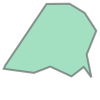

In [33]:
contiguous_usa.iloc[1]['geometry']

In [34]:
print(contiguous_usa)

                                               geometry
0     POLYGON ((-78.90200 34.83527, -78.79960 34.850...
1     POLYGON ((-80.49737 35.20210, -80.29542 35.502...
2     POLYGON ((-81.68699 41.13596, -81.68495 41.277...
3     POLYGON ((-76.81373 41.59003, -76.22014 41.541...
4     POLYGON ((-95.15274 32.66095, -95.15211 32.902...
...                                                 ...
3215  POLYGON ((-99.84661 48.37130, -99.49292 48.370...
3216  POLYGON ((-67.10904 18.05608, -67.06791 18.066...
3217  POLYGON ((-97.36812 41.04695, -96.91094 41.046...
3218  POLYGON ((-81.90665 35.88338, -81.94319 35.960...
3219  POLYGON ((-84.43301 32.04196, -84.43121 32.134...

[3220 rows x 1 columns]
